In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#DATA PRE-PROCESSING

In [ ]:
features = pd.read_csv('/content/drive/My Drive/FODS_case_study/train_values.csv')

In [ ]:
labels = pd.read_csv('/content/drive/My Drive/FODS_case_study/train_labels.csv')

In [ ]:
features.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [ ]:
labels.describe()

,building_id,damage_grade
count,2.606010e+05,260601.000000
mean,5.256755e+05,2.238272
std,3.045450e+05,0.611814
min,4.000000e+00,1.000000
25%,2.611900e+05,2.000000
50%,5.257570e+05,2.000000
75%,7.897620e+05,3.000000
max,1.052934e+06,3.000000


In [ ]:
features.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
features.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
features.shape

(260601, 39)

In [ ]:
labels.shape

(260601, 2)

In [ ]:
train = pd.merge(features, labels)

In [ ]:
train.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,0.034332,0.018235,0.068154,0.075268,0.254988,0.085011,0.042590,0.015859,0.014985,0.983949,0.111880,0.064378,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,0.182081,0.133800,0.252010,0.263824,0.435855,0.278899,0.201931,0.124932,0.121491,0.418389,0.315219,0.245426,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
train.isnull().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

#DATA VISUALIZATION

In [ ]:
sns.set_style('darkgrid')

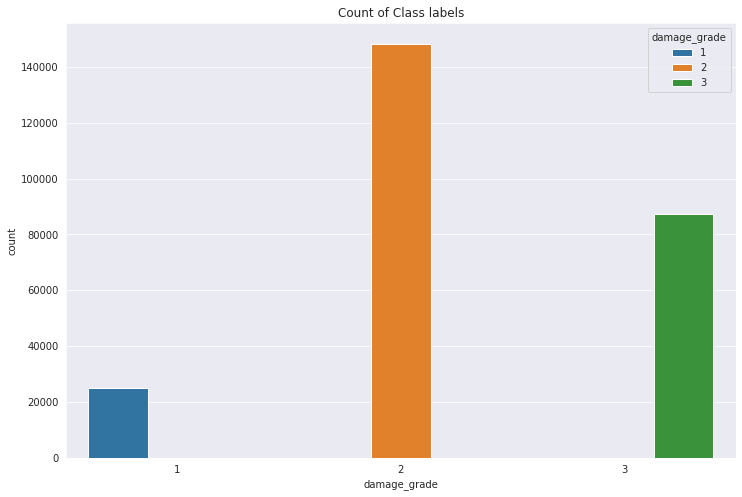

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Count of Class labels')
sns.countplot(x='damage_grade', data=train, hue='damage_grade')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


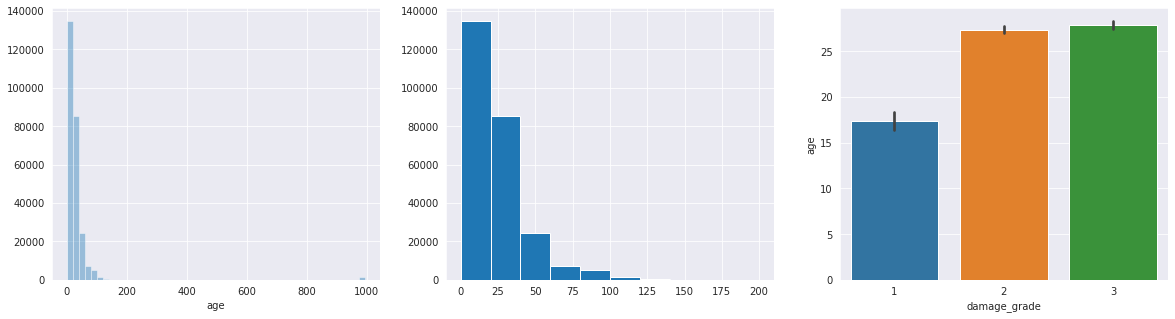

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.distplot(train['age'], kde = False)

plt.subplot(1,3,2)
plt.hist(train['age'], range=(0,200))

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'],train['age'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


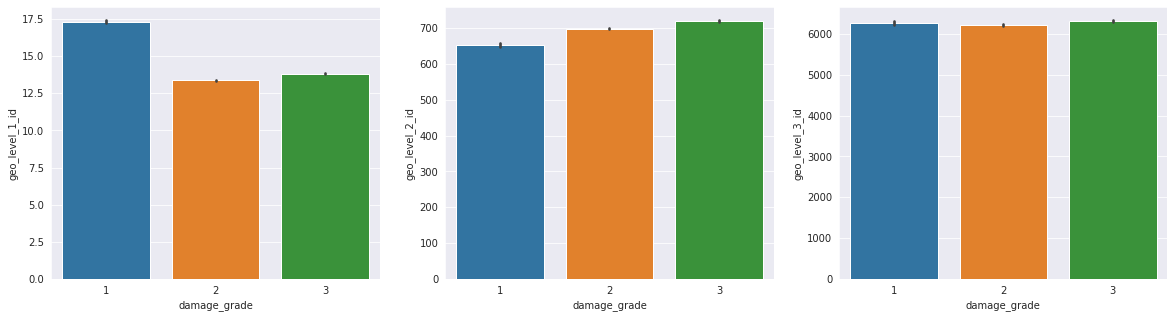

In [ ]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.barplot(train['damage_grade'], train['geo_level_1_id'])

plt.subplot(1,3,2)
sns.barplot(train['damage_grade'], train['geo_level_2_id'])

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'], train['geo_level_3_id'])

plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


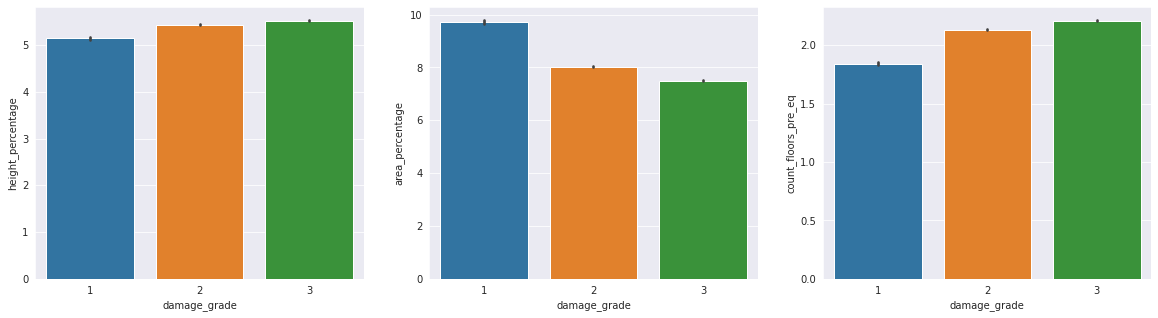

In [ ]:
plt.figure(figsize = (20,5))

plt.subplot(1,3,1)
sns.barplot(train['damage_grade'], train['height_percentage'])

plt.subplot(1,3,2)
sns.barplot(train['damage_grade'], train['area_percentage'])

plt.subplot(1,3,3)
sns.barplot(train['damage_grade'], train['count_floors_pre_eq'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


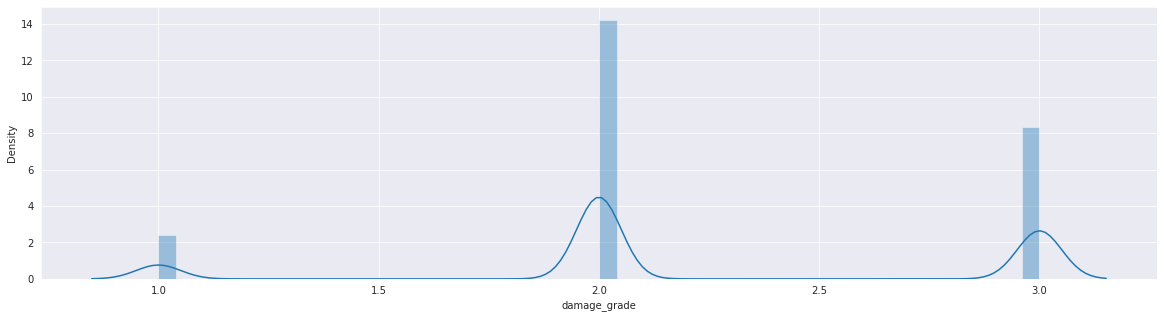

In [ ]:
plt.figure(figsize = (20,5))
sns.distplot(train['damage_grade'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

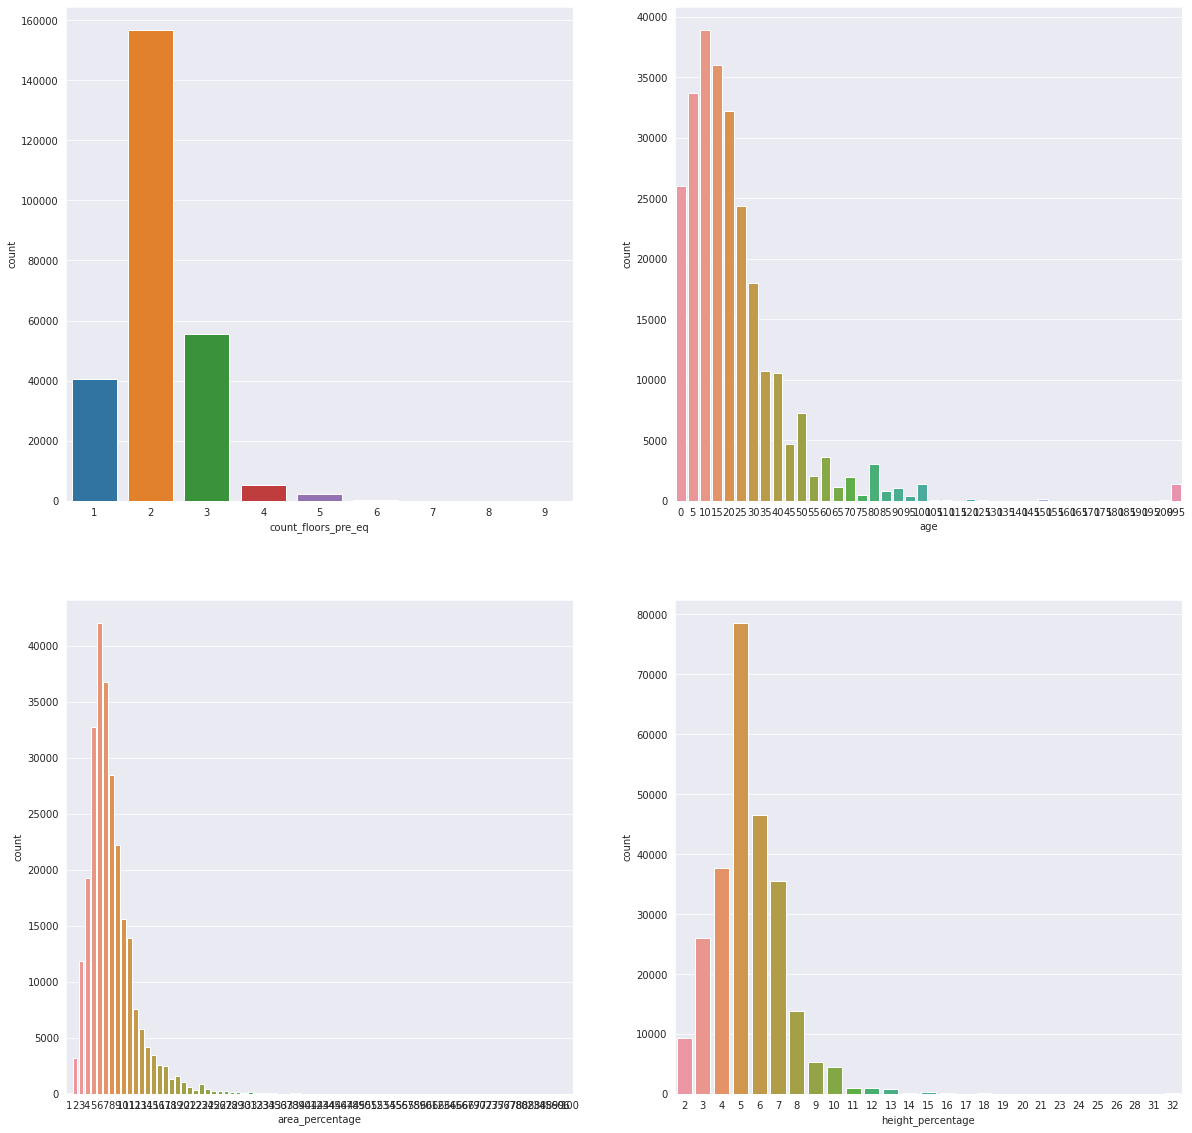

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 20))
sns.countplot(train['count_floors_pre_eq'], ax = axes[0][0])
sns.countplot(train['age'], ax = axes[0][1])
sns.countplot(train['area_percentage'], ax = axes[1][0])
sns.countplot(train['height_percentage'], ax = axes[1][1])

In [ ]:
print(f"Floor Count Unique Values : {train['count_floors_pre_eq'].unique()}")
print(f"Age Unique Values : {train['age'].unique()}")
print(f"Area Percentage Unique Values : {train['area_percentage'].unique()}")
print(f"Height Percentage Unique Values : {train['height_percentage'].unique()}")

Floor Count Unique Values : [2 3 1 4 5 6 7 8 9]
Age Unique Values : [ 30  10  25   0  15  20  45  55   5  40  80  60  35  70  50  65 100  75
  85 190 995 105  90 120  95 110 115 150 200 130 125 140 155 160 175 135
 145 195 180 165 170 185]
Area Percentage Unique Values : [  6   8   5   9   3  13   7   4  12  16  11  27  10  15  14  17  21  37
  19   2  28  38  56   1  20  24  34  26  18  31  25  23  22  32  47  36
  40  29  42  55  35  39 100  50  51  43  30  62  85  33  45  52  57  49
  67  66  54  75  65  58  48  64  63  46  59  86  78  41  44  61  70  77
  73  72  53  60  84  83  76  96  80  90  82  69]
Height Percentage Unique Values : [ 5  7  9  4  6  3 10  8  2 32 12 11 13 16 15 18 26 17 19 14 20 23 21 25
 24 28 31]


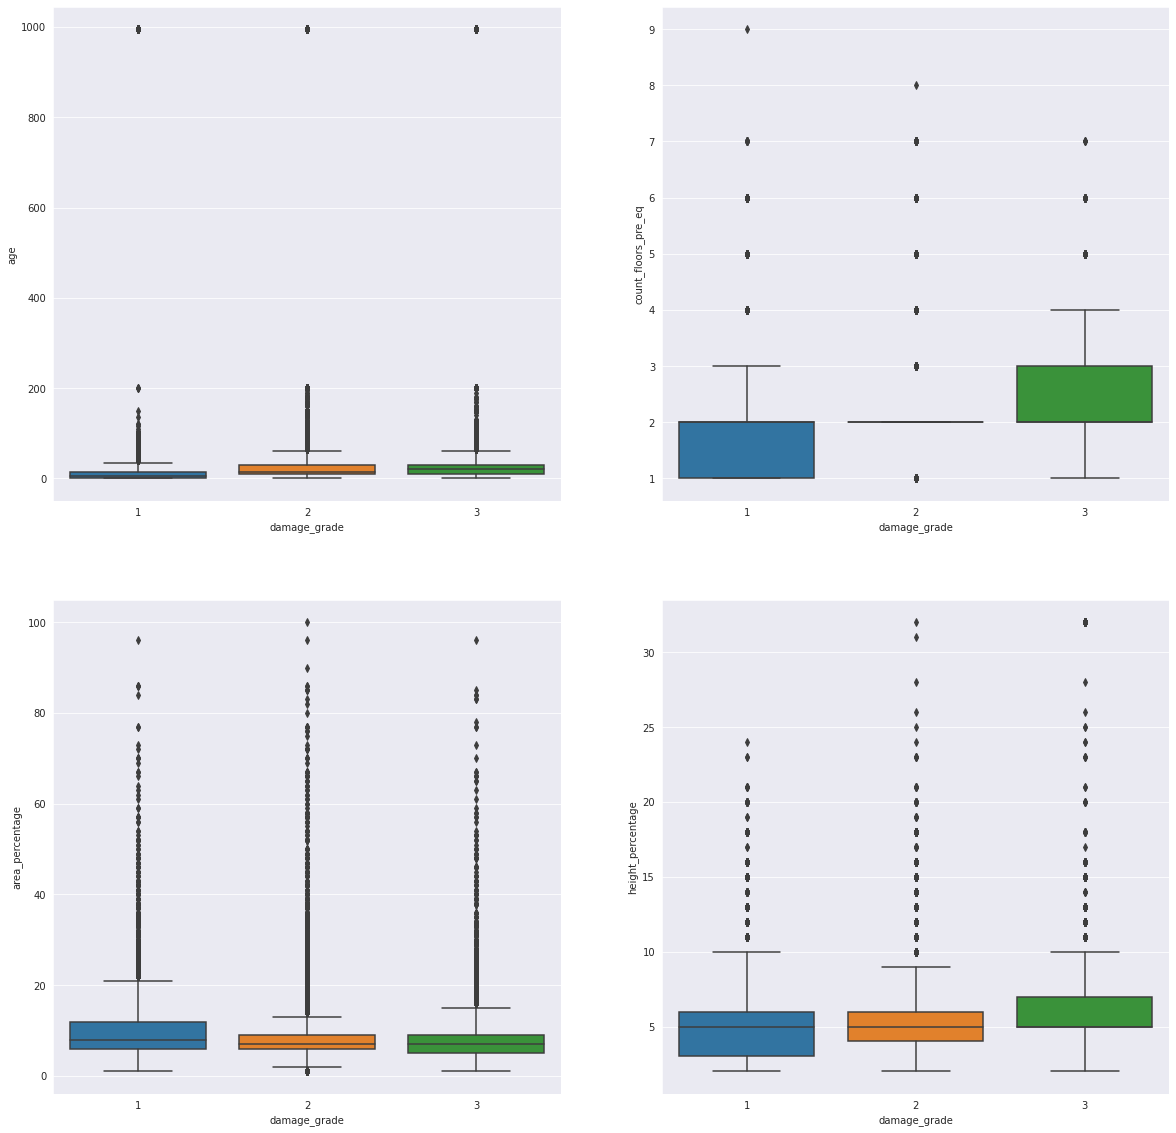

In [ ]:
fig, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (20, 20))
sns.boxplot(y= train['age'], x= labels['damage_grade'], ax = axes[0][0])
sns.boxplot(y= train['count_floors_pre_eq'], x= labels['damage_grade'], ax = axes[0][1])
sns.boxplot(y= train['area_percentage'], x= labels['damage_grade'], ax = axes[1][0])
sns.boxplot(y= train['height_percentage'], x= labels['damage_grade'], ax = axes[1][1])

In [ ]:
print(f"Land Surface Condition Catagories : {train['land_surface_condition'].unique()}")
print(f"Foundation Type Catagories : {train['foundation_type'].unique()}")
print(f"Roof Type Catagories : {train['roof_type'].unique()}")
print(f"Ground Floor Types Catagories : {train['ground_floor_type'].unique()}")
print(f"Other Floor Type Catagories : {train['other_floor_type'].unique()}")
print(f"Positions Catagories : {train['position'].unique()}")
print(f"Plan Coniguration Catagories : {train['plan_configuration'].unique()}")
print(f"Legal Ownership Catagories : {train['legal_ownership_status'].unique()}")

Land Surface Condition Catagories : ['t' 'o' 'n']
Foundation Type Catagories : ['r' 'w' 'i' 'u' 'h']
Roof Type Catagories : ['n' 'q' 'x']
Ground Floor Types Catagories : ['f' 'x' 'v' 'z' 'm']
Other Floor Type Catagories : ['q' 'x' 'j' 's']
Positions Catagories : ['t' 's' 'j' 'o']
Plan Coniguration Catagories : ['d' 'u' 's' 'q' 'm' 'c' 'a' 'n' 'f' 'o']
Legal Ownership Catagories : ['v' 'a' 'r' 'w']


In [ ]:
print("Low Damage %", train[train.damage_grade == 1].shape[0]*100/train.shape[0])

Low Damage % 9.64079186188848


In [ ]:
print("Medium Damage %", train[train.damage_grade == 2].shape[0]*100/train.shape[0])

Medium Damage % 56.89118614280068


In [ ]:
print("High Damage %", train[train.damage_grade == 3].shape[0]*100/train.shape[0])

High Damage % 33.46802199531084


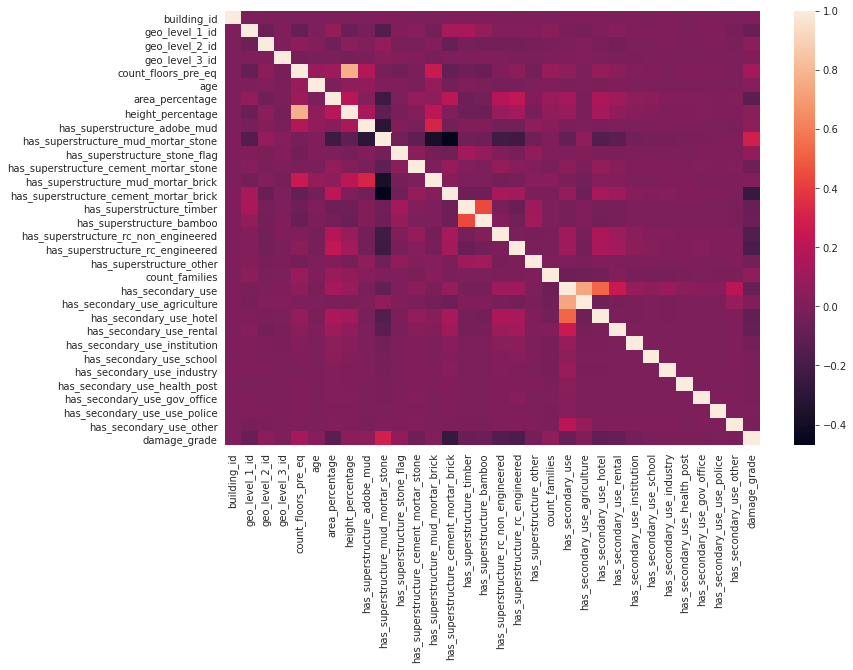

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(train.corr())
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


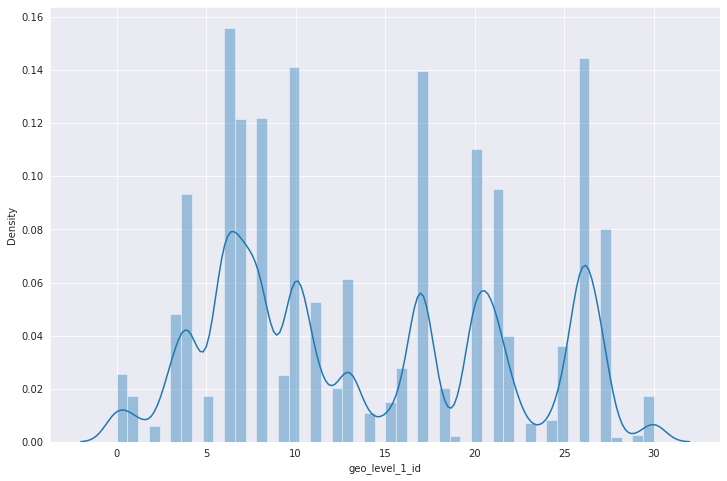

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(train['geo_level_1_id'], kde = True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


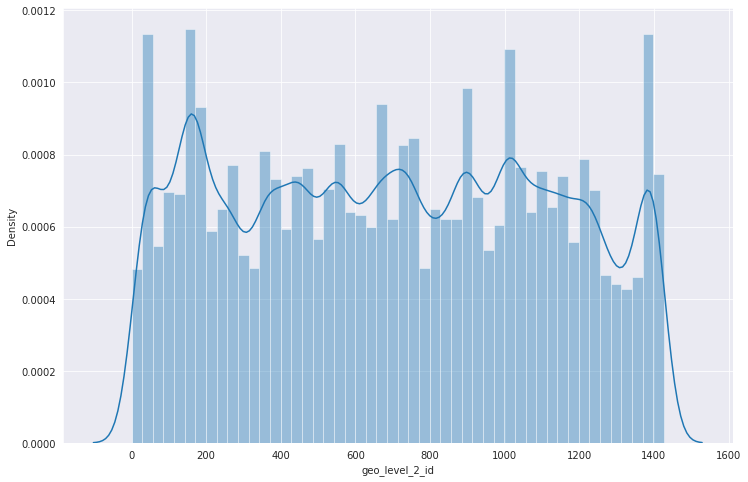

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(train['geo_level_2_id'], kde = True)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


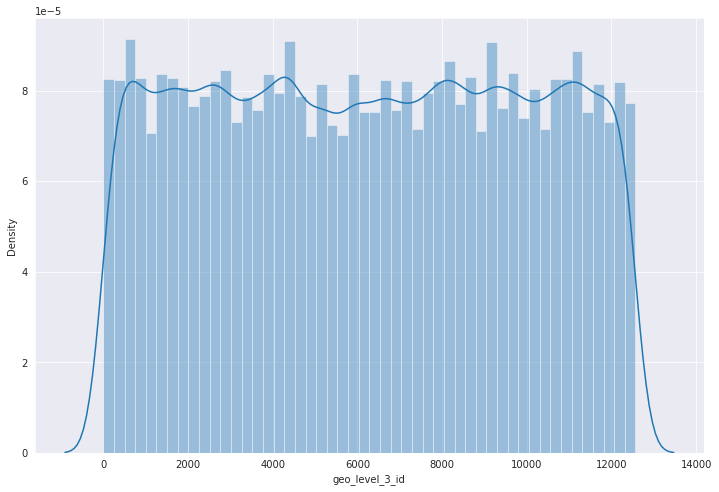

In [ ]:
plt.figure(figsize = (12,8))
sns.distplot(train['geo_level_3_id'], kde = True)
plt.show()

In [ ]:
train.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

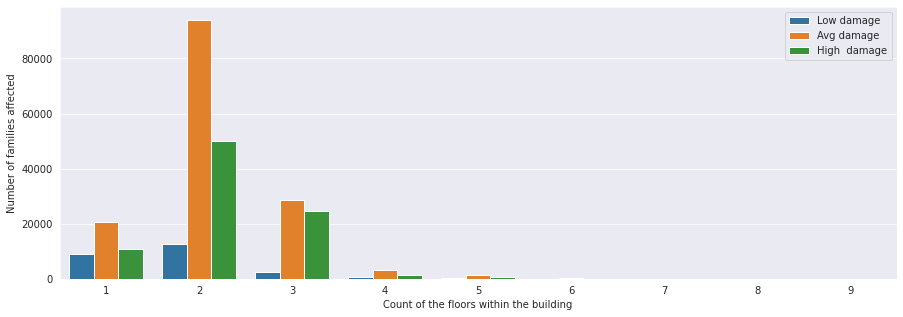

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(x = train["count_floors_pre_eq"], hue = train["damage_grade"])
plt.legend(["Low damage","Avg damage","High  damage"], loc="upper right")
plt.xlabel('Count of the floors within the building')
plt.ylabel('Number of families affected')
plt.show()

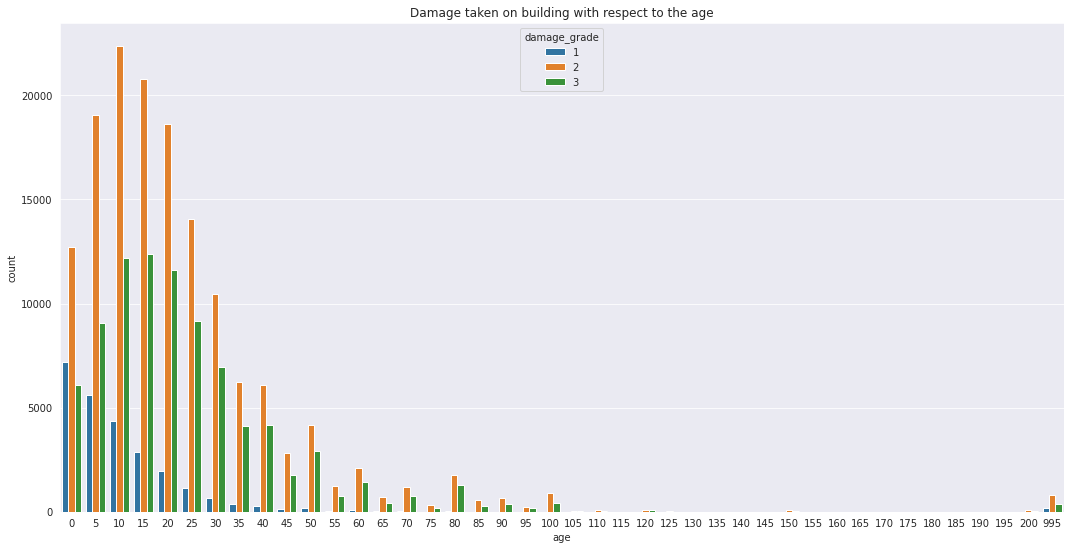

In [ ]:
plt.figure(figsize=(18,9))
plt.title('Damage taken on building with respect to the age')
sns.countplot(x='age', data=train, hue='damage_grade')

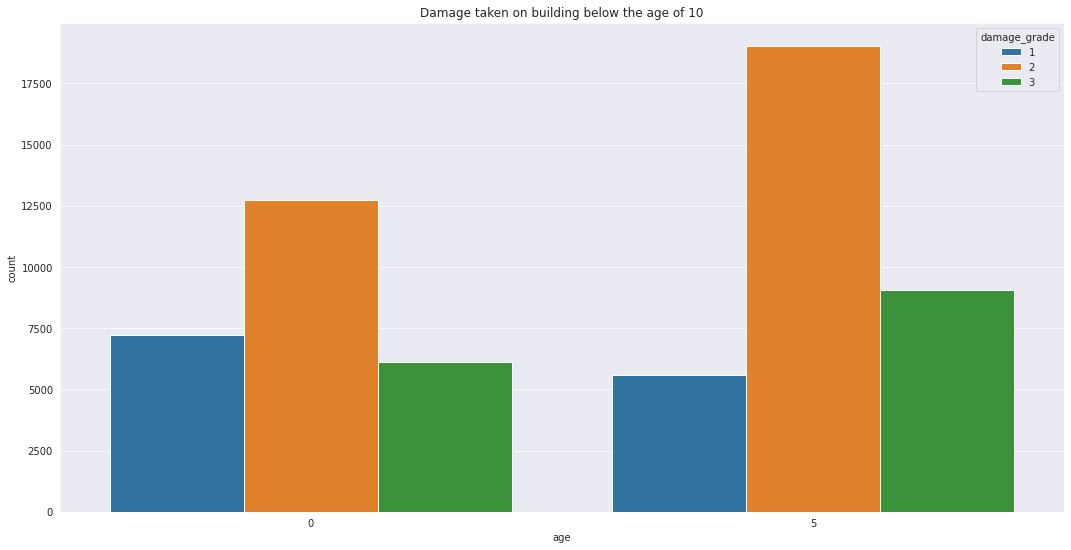

In [ ]:
plt.figure(figsize=(18,9))
plt.title('Damage taken on building below the age of 10')
sns.countplot(x='age', data=train[train.age<10], hue='damage_grade')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


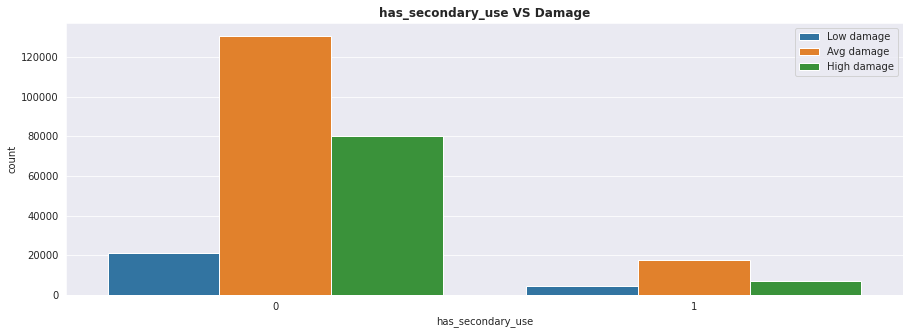

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


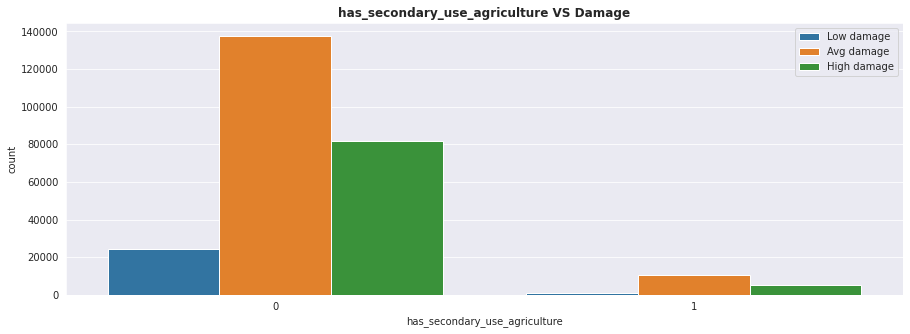

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


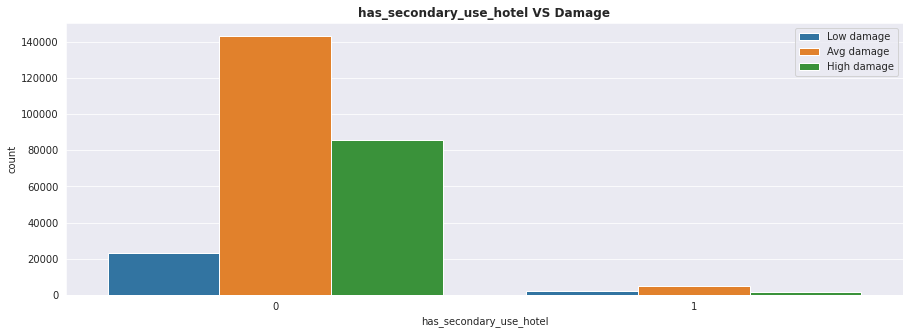

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


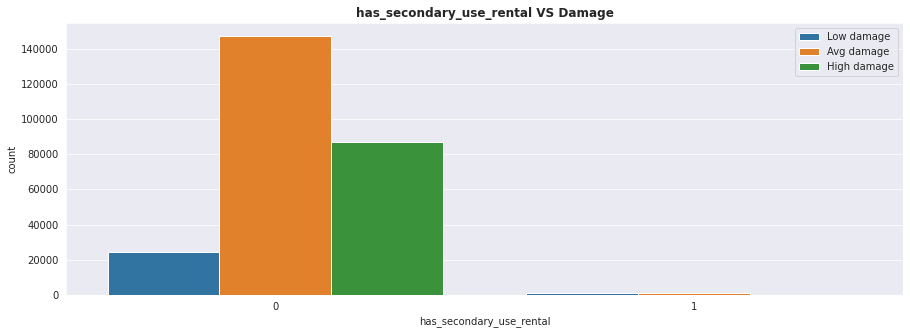

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


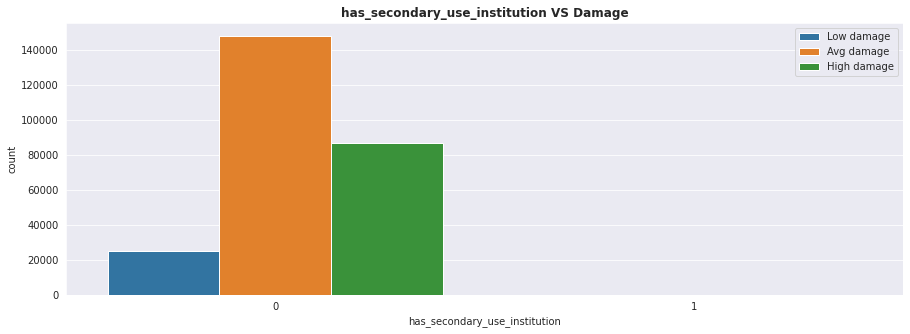

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


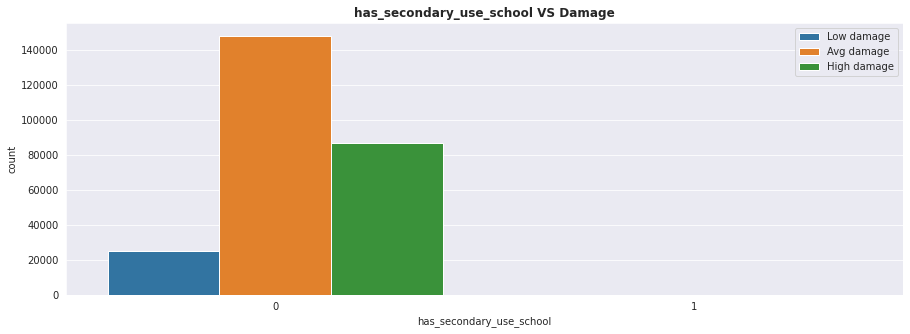

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


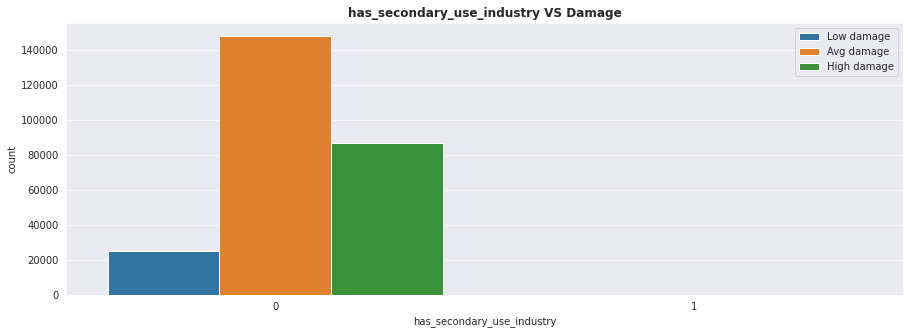

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


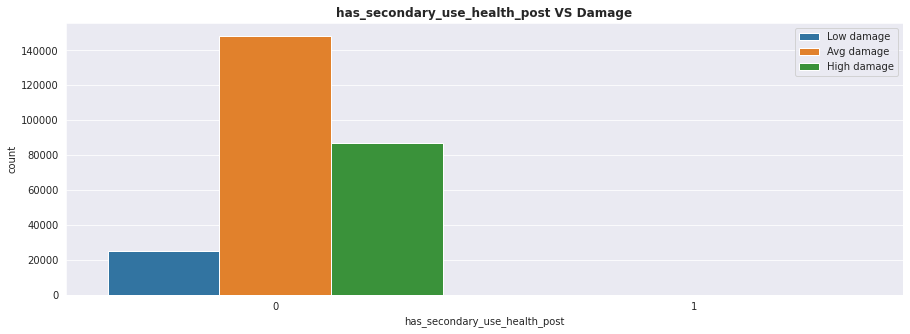

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


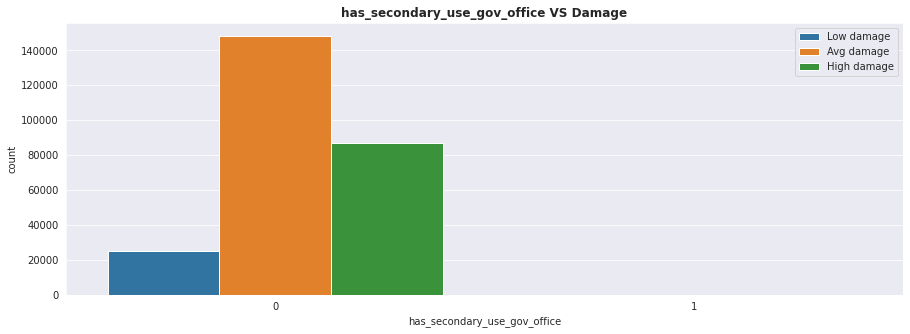

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


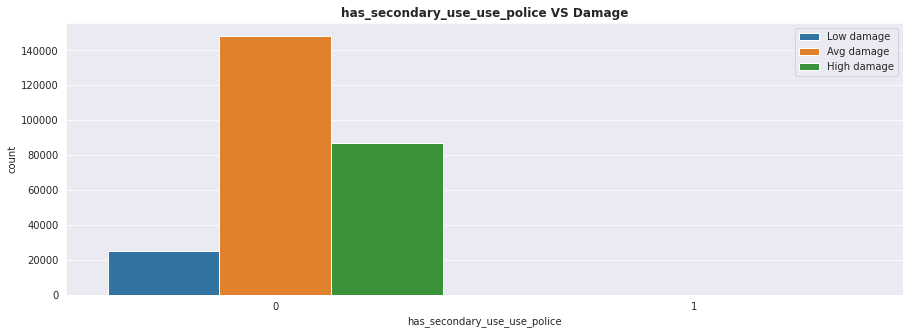

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


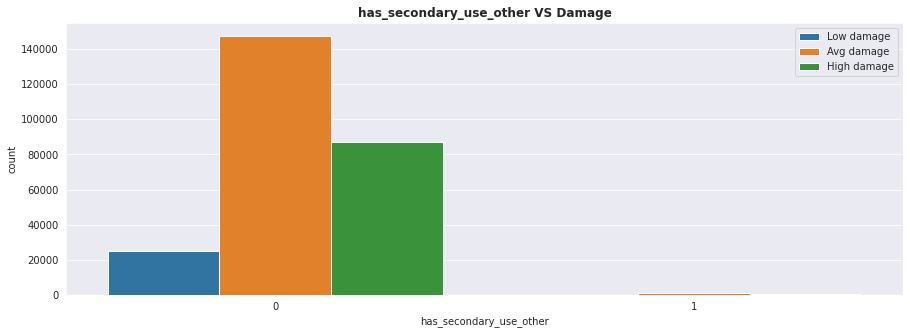

In [ ]:
binary_cols=["has_secondary_use","has_secondary_use_agriculture",
          "has_secondary_use_hotel","has_secondary_use_rental","has_secondary_use_institution","has_secondary_use_school","has_secondary_use_industry",
          "has_secondary_use_health_post","has_secondary_use_gov_office","has_secondary_use_use_police","has_secondary_use_other"]
for col in binary_cols:
    plt.figure(figsize=(15,5))
    sns.countplot(train[col], hue=train.damage_grade)
    plt.title(col+ " VS Damage", fontweight="bold")
    plt.legend(["Low damage","Avg damage","High damage"]) 
    plt.show()

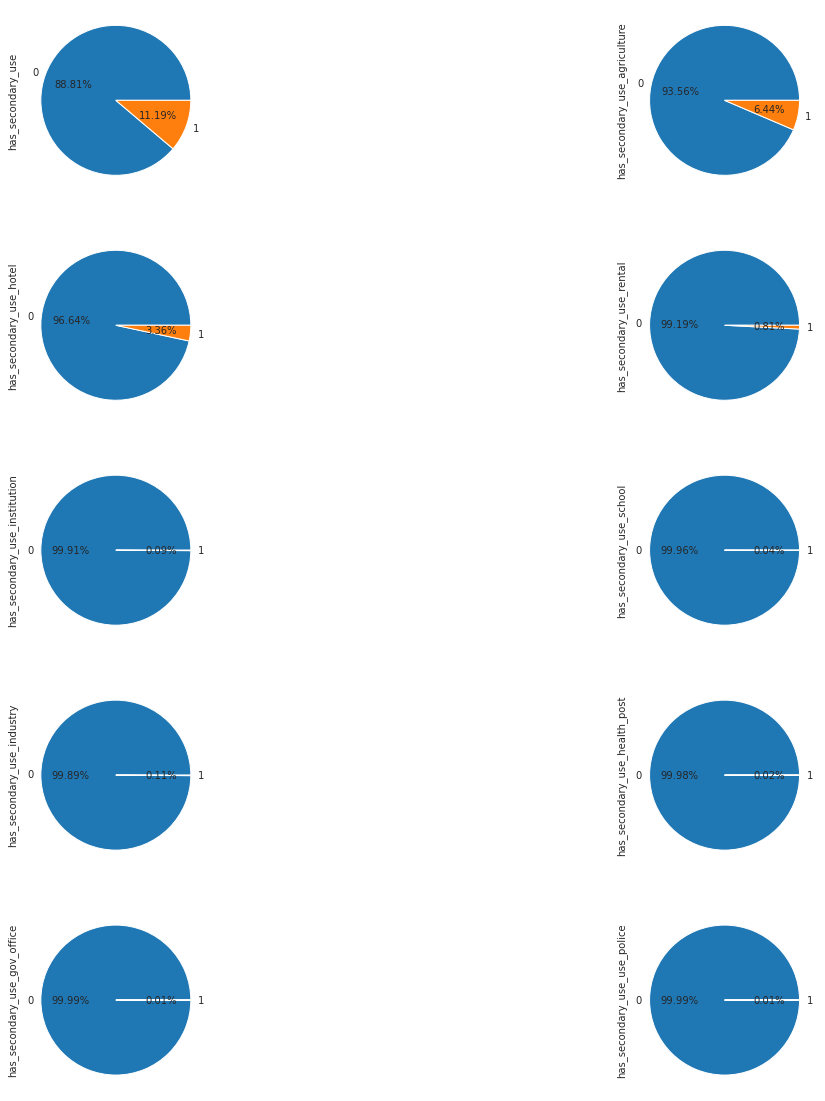

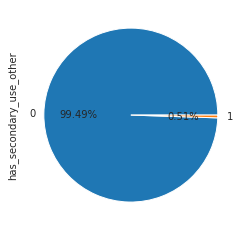

In [ ]:
cols=[["has_secondary_use","has_secondary_use_agriculture"],
             ["has_secondary_use_hotel","has_secondary_use_rental"],
             ["has_secondary_use_institution","has_secondary_use_school"],
             ["has_secondary_use_industry", "has_secondary_use_health_post"],
             ["has_secondary_use_gov_office","has_secondary_use_use_police"]]

fig, axes = plt.subplots(ncols = 2, nrows = 5, figsize = (20,20))
for i, c in enumerate(cols):
    train[c[0]].value_counts().plot.pie(autopct="%.2f%%", ax = axes[i][0])
    train[c[1]].value_counts().plot.pie(autopct="%.2f%%", ax = axes[i][1])
plt.show()
train['has_secondary_use_other'].value_counts().plot.pie(autopct = "%.2f%%")
plt.show()

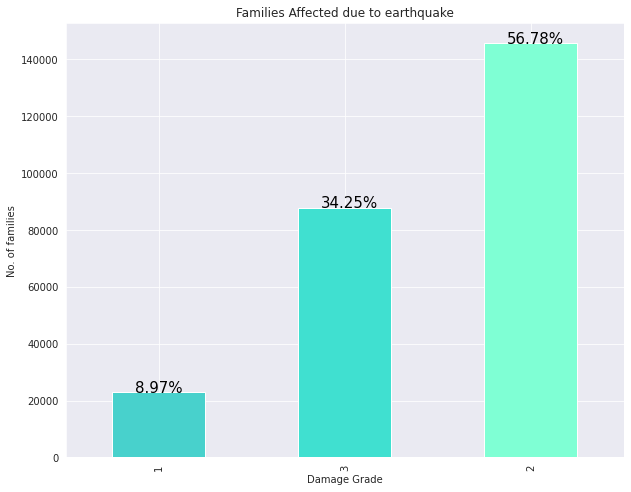

In [ ]:
plt.figure(figsize=(10,8))
ax=train.groupby("damage_grade")["count_families"].sum().sort_values().plot.bar(color=["mediumturquoise","turquoise","aquamarine"],
                                                                               )
# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.12, i.get_height()+5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')
plt.title("Families Affected due to earthquake")
plt.ylabel("No. of families")
plt.xlabel("Damage Grade")
plt.show()

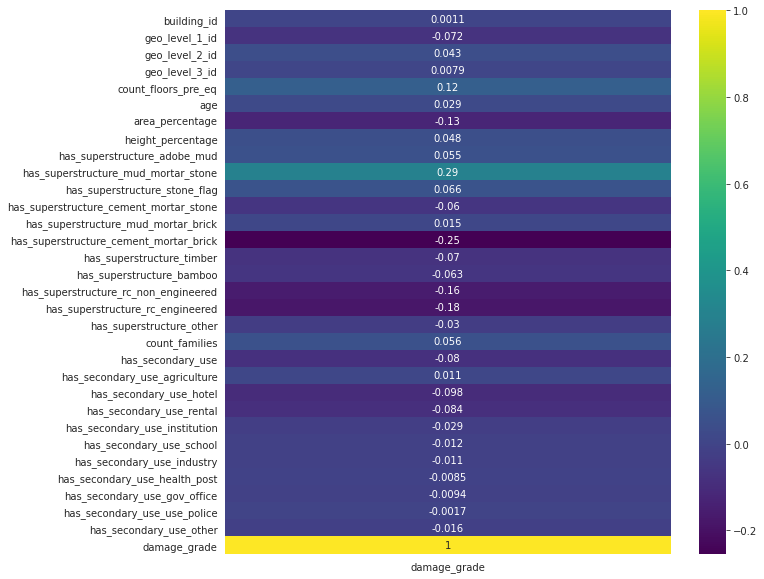

In [ ]:
plt.figure(figsize=(10,10))
cor=train.corr()["damage_grade"]
cor=pd.DataFrame(cor)
sns.heatmap(cor,annot=True,cmap="viridis")

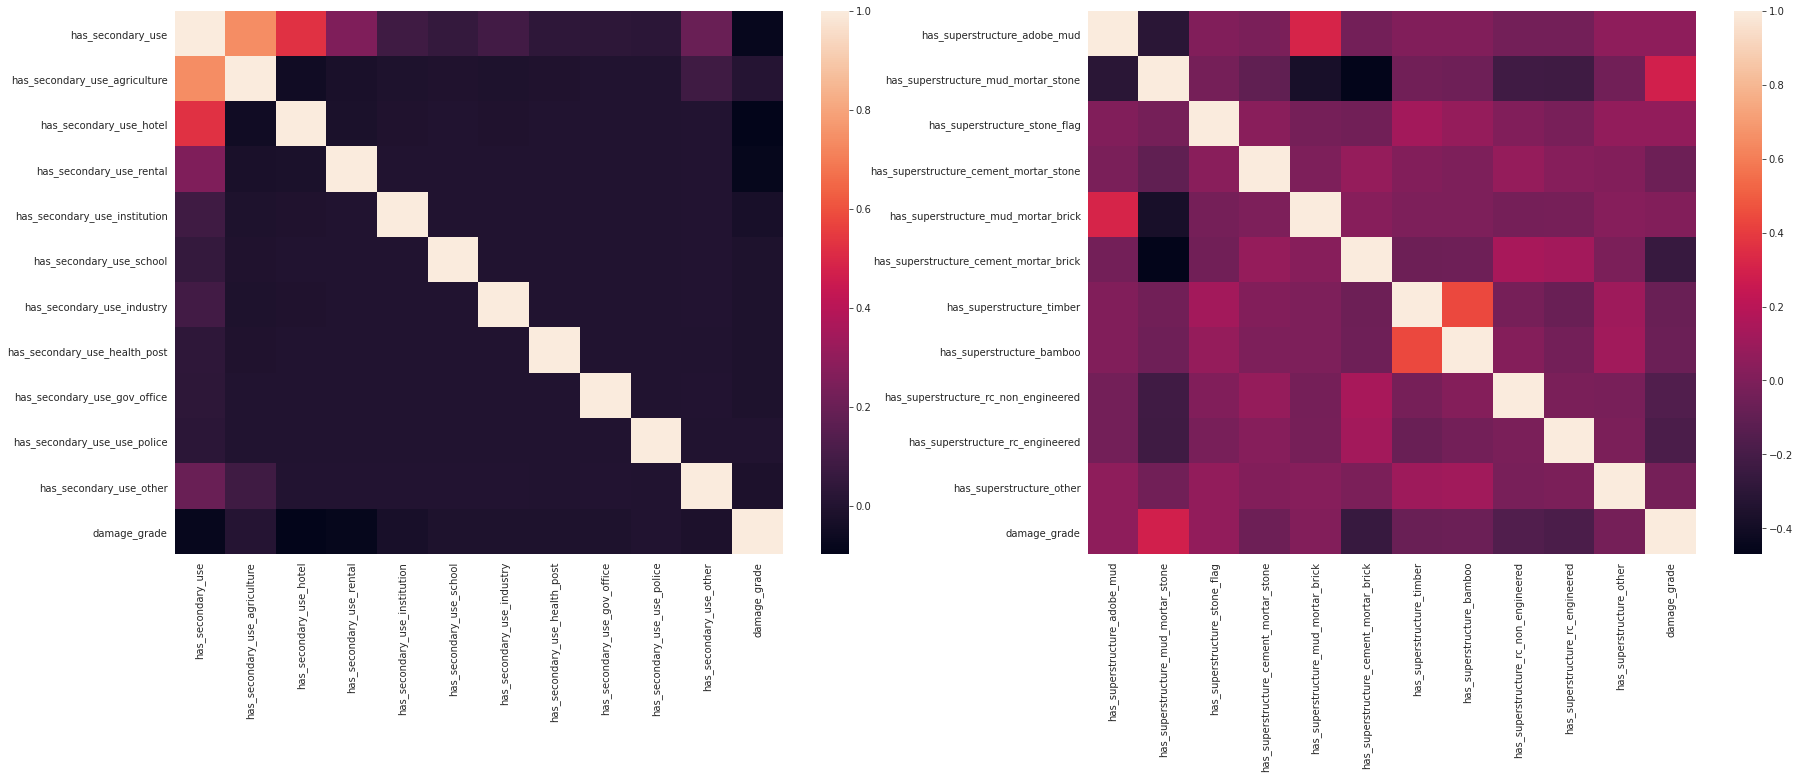

In [ ]:
superstructure_cols = [x for x in train.columns if 'super' in x]
secondary_use_cols = [x for x in train.columns if 'secondary' in x]

superstructure_corr = train[superstructure_cols+['damage_grade']].corr()
secondary_use_corr = train[secondary_use_cols+['damage_grade']].corr()

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
sns.heatmap(secondary_use_corr)

plt.subplot(1,2,2)
sns.heatmap(superstructure_corr)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

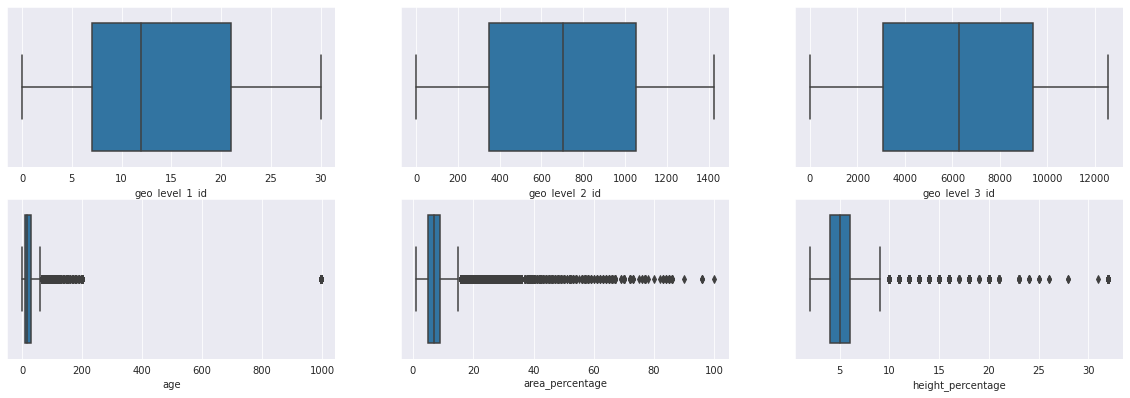

In [ ]:
num_features = ['geo_level_1_id','geo_level_2_id','geo_level_3_id','age','area_percentage','height_percentage']
i = 1

plt.figure(figsize=(20,10))

for col in num_features:
    plt.subplot(3,3,i)
    ax=sns.boxplot(train[col].dropna())
    plt.xlabel(col)
    i+=1
plt.show()

<Figure size 864x576 with 0 Axes>

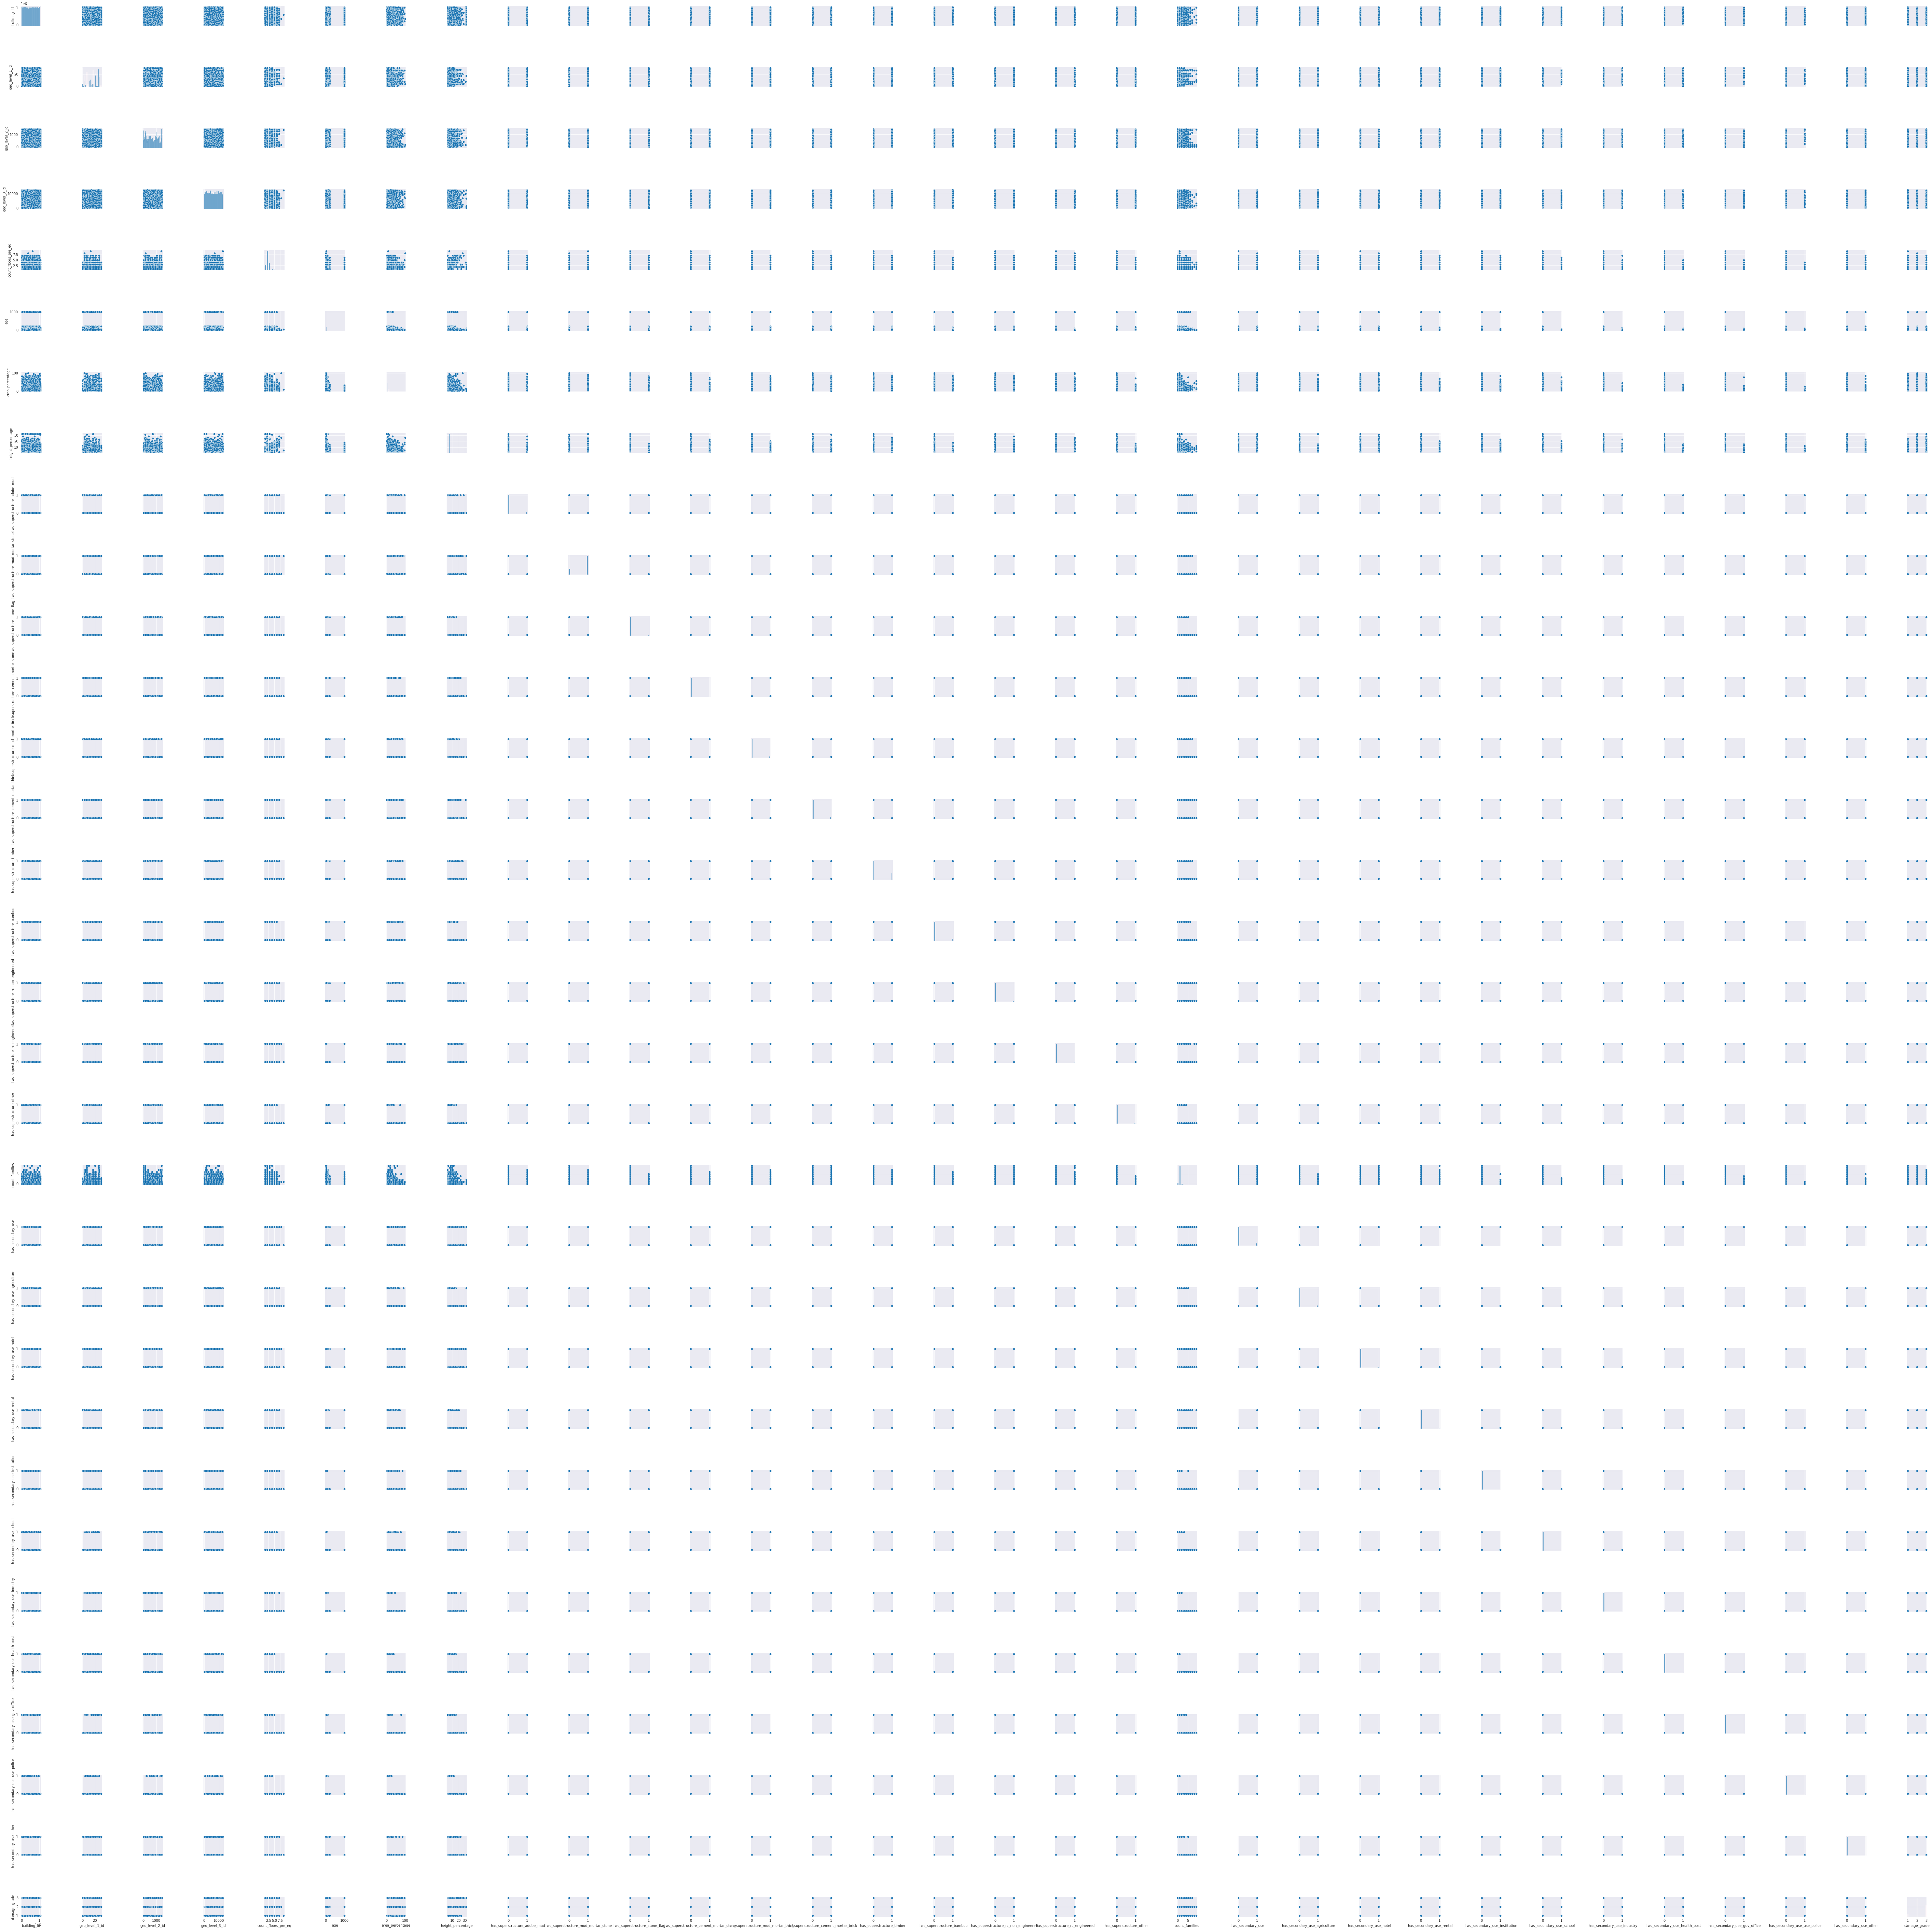

In [ ]:
plt.figure(figsize = (12,8))
sns.pairplot(train)
plt.show()

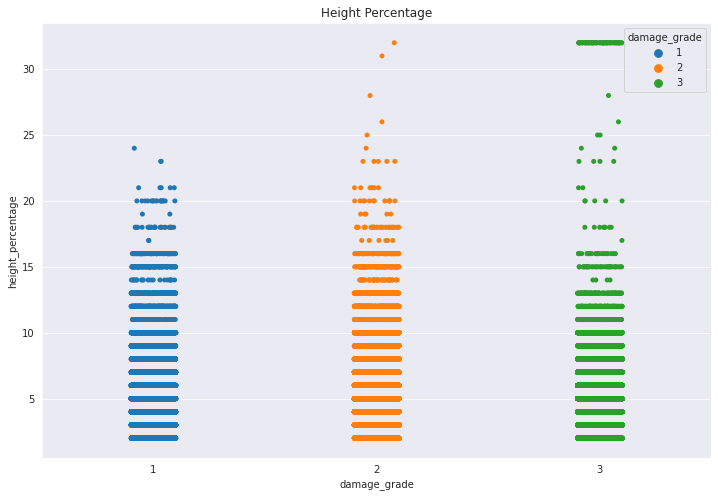

In [ ]:
plt.figure(figsize = (12,8))
sns.stripplot(data=train, x='damage_grade', y='height_percentage', hue='damage_grade', jitter=True)
plt.title('Height Percentage')
plt.show()

#HYPOTHESIS TESTING

##Z-TEST

In [ ]:
train.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
#hypothesis_testing on land_surface_condition (z_test)
train.land_surface_condition.unique(),train.damage_grade.unique()

(array(['t', 'o', 'n'], dtype=object), array([3, 2, 1]))

The Hypothesis Testing is conducted for two assumption
1. land-surface condition "t" had a higher damage rate than land-surface condition "o"  

  *    Null Hypothesis: The land-surface condition didn’t have an effect on the damage rate.

  *   Alternative Hypothesis: The land-surface condition  affected the damage rate

2. land-surface condition "o" had a higher damage rate than land-surface condition "n" 

  *    Null Hypothesis: The land-surface condition didn’t have an effect on the damage rate.

  *   Alternative Hypothesis: The land-surface condition  affected the damage rate



In [ ]:
t_Sample = np.array([np.mean(train[train["land_surface_condition"]=='t'].sample(50)["damage_grade"].values) for i in range(100)])
o_Sample = np.array([np.mean(train[train["land_surface_condition"]=='o'].sample(50)["damage_grade"].values) for i in range(100)])
n_Sample = np.array([np.mean(train[train["land_surface_condition"]=='n'].sample(50)["damage_grade"].values) for i in range(100)])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

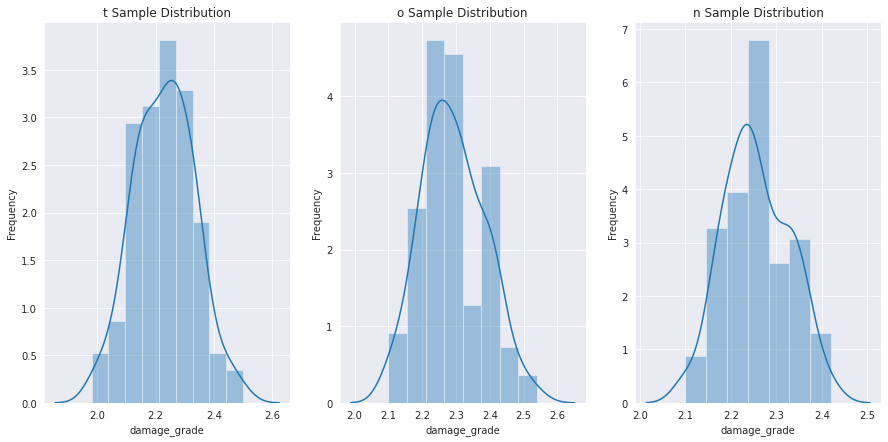

In [ ]:
plt.subplots(1, 2, figsize = (15, 7))
plt.subplot(1,3, 1)
sns.distplot(t_Sample)
plt.title("t Sample Distribution")
plt.xlabel("damage_grade")
plt.ylabel("Frequency")
plt.subplot(1, 3, 2)
sns.distplot(o_Sample)
plt.title("o Sample Distribution")
plt.xlabel("damage_grade")
plt.ylabel("Frequency")
plt.subplot(1, 3, 3)
sns.distplot(n_Sample)
plt.title("n Sample Distribution")
plt.xlabel("damage_grade")
plt.ylabel("Frequency")
plt.show()

**land-surface condition "t" had a higher damage rate than land-surface condition "o"**



In [ ]:
effect = np.mean(t_Sample) - np.mean(o_Sample)
sigma_t = np.std(t_Sample)
sigma_o = np.std(o_Sample)
sigma_difference = np.sqrt((sigma_t**2)/len(t_Sample)  +  (sigma_o**2)/len(o_Sample))
z_score_1 = effect / sigma_difference
z_score_1

-4.497199477611229

In [ ]:
from scipy import stats as st
print("P-value",st.norm.sf(abs(z_score_1)))

P-value 3.4427191375068623e-06


The P-value is smaller than the significance level of 0.05 . That Null hypothesis is rejected

**land-surface condition "o" had a higher damage rate than land-surface condition "n"**

In [ ]:
effect = np.mean(o_Sample) - np.mean(n_Sample)
sigma_o = np.std(o_Sample)
sigma_n = np.std(n_Sample)
sigma_difference = np.sqrt((sigma_o**2)/len(o_Sample)  +  (sigma_n**2)/len(n_Sample))
z_score_2 = effect / sigma_difference
z_score_2

3.0368264221601486

In [ ]:
print("P-value",st.norm.sf(abs(z_score_2)))

P-value 0.0011954154392547012


The P-value is lesser than the significance level of 0.05 . That Null hypothesis is rejected

**'From the above tests we can conclude that the land-surface-conditions does have an effect on the damage rate of the earth quake'**

##chi-square test

In [ ]:
numerical_cols = [col for col in train.columns if train[col].dtype != 'object']
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
chi_train=train[:]
chi_train['land_surface_condition'] = le.fit_transform(train.land_surface_condition)
chi_train['foundation_type'] = le.fit_transform(train.foundation_type)
chi_train['roof_type'] = le.fit_transform(train.roof_type)
chi_train['ground_floor_type'] = le.fit_transform(train.ground_floor_type)
chi_train['position'] = le.fit_transform(train.position)
chi_train['plan_configuration'] = le.fit_transform(train.plan_configuration)
chi_train['other_floor_type'] = le.fit_transform(train.other_floor_type)
chi_train['legal_ownership_status'] = le.fit_transform(train.legal_ownership_status)

In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
stat, p, dof, expected = chi2_contingency(chi_train)

In [ ]:
print('degres of freedom = %d' % dof)
print('\n \n')
print(expected)
prob = 0.90
critical = chi2.ppf(prob, dof)
print('probability=%.6f, critical=%.6f, stat=%.6f' % (prob, critical, stat))
print('\n \n')
if abs(stat) >= critical:
    print('Dependent (reject Null Hypothesis)')
    
else:
    print('Independent (fail to reject Null Hypothesis)')
    
alpha = 1.0 - prob
print('significance=%.6f, p=%.6f' % (alpha, p))
if p <= alpha:
    print('Dependent (reject Null Hypothesis)')
    print('\n \n')
else:
    print('Independent (fail to reject Null Hypothesis)')
    print('\n \n')

degres of freedom = 10163400

 

[[8.04890911e+05 2.12836027e+01 1.07345437e+03 ... 1.35136000e-04
  7.83788799e-03 3.42714297e+00]
 [3.21637431e+04 8.50500757e-01 4.28956396e+01 ... 5.40008531e-06
  3.13204948e-04 1.36949920e-01]
 [1.02967594e+05 2.72275577e+00 1.37324217e+02 ... 1.72875959e-05
  1.00268056e-03 4.38425459e-01]
 ...
 [6.02767729e+05 1.59388915e+01 8.03889871e+02 ... 1.01200819e-04
  5.86964753e-03 2.56652318e+00]
 [1.51350374e+05 4.00213394e+00 2.01850608e+02 ... 2.54107530e-05
  1.47382367e-03 6.44434374e-01]
 [7.46775328e+05 1.97468616e+01 9.95947681e+02 ... 1.25378768e-04
  7.27196853e-03 3.17969277e+00]]
probability=0.900000, critical=10169178.335683, stat=4262839495.385924

 

Dependent (reject Null Hypothesis)
significance=0.100000, p=0.000000
Dependent (reject Null Hypothesis)

 



#ML Models (Classification)

In [ ]:
train.dtypes

building_id                                int64
geo_level_1_id                             int64
geo_level_2_id                             int64
geo_level_3_id                             int64
count_floors_pre_eq                        int64
age                                        int64
area_percentage                            int64
height_percentage                          int64
land_surface_condition                    object
foundation_type                           object
roof_type                                 object
ground_floor_type                         object
other_floor_type                          object
position                                  object
plan_configuration                        object
has_superstructure_adobe_mud               int64
has_superstructure_mud_mortar_stone        int64
has_superstructure_stone_flag              int64
has_superstructure_cement_mortar_stone     int64
has_superstructure_mud_mortar_brick        int64
has_superstructure_c

In [ ]:
categorical = ['land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 
               'plan_configuration', 'legal_ownership_status']

In [ ]:
train = pd.get_dummies(data = train, columns = categorical, drop_first = True)

In [ ]:
train.drop(columns = ['building_id'], axis = 1, inplace = True)

In [ ]:
train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade,land_surface_condition_o,land_surface_condition_t,foundation_type_i,foundation_type_r,foundation_type_u,foundation_type_w,roof_type_q,roof_type_x,ground_floor_type_m,ground_floor_type_v,ground_floor_type_x,ground_floor_type_z,other_floor_type_q,other_floor_type_s,other_floor_type_x,position_o,position_s,position_t,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,30,6,5,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,10,8,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,10,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,10,6,5,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,30,8,9,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
260597,17,715,2060,2,0,6,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
260598,17,51,8163,3,55,6,7,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
260599,26,39,1851,2,10,14,6,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
import statsmodels.api as sm
x_feature = np.append(arr = np.ones((train.shape[0],1)).astype(int), values = train.iloc[:,:-1], axis = 1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
x_feature_opt = x_feature[:,:]
regressor_OLS = sm.OLS(endog = train.iloc[:,-1], exog = x_feature_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     legal_ownership_status_w   R-squared:                       0.345
Model:                                  OLS   Adj. R-squared:                  0.345
Method:                       Least Squares   F-statistic:                     2291.
Date:                      Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                              15:32:34   Log-Likelihood:             2.8332e+05
No. Observations:                    260601   AIC:                        -5.665e+05
Df Residuals:                        260540   BIC:                        -5.659e+05
Df Model:                                60                                         
Covariance Type:                  nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3681      0.006     63.790      0.000       0.357       0.379
x1         -9.716e-05   2.09e-05     -4.645      0.000      -0.000   -5.62e-05
x2           2.55e-06   3.93e-07      6.494      0.000    1.78e-06    3.32e-06
x3          -6.78e-07   4.39e-08    -15.437      0.000   -7.64e-07   -5.92e-07
x4             0.0016      0.000      3.797      0.000       0.001       0.002
x5          4.008e-06    2.2e-06      1.824      0.068   -2.98e-07    8.31e-06
x6             0.0003   4.08e-05      6.853      0.000       0.000       0.000
x7            -0.0002      0.000     -1.668      0.095      -0.001    4.05e-05
x8             0.0131      0.001     19.993      0.000       0.012       0.014
x9             0.0121      0.001     19.045      0.000       0.011       0.013
x10            0.0044      0.001      4.791      0.000       0.003       0.006
x11           -0.0009      0.001     -0.703      0.482      -0.003       0.002
x12            0.0043      0.001      5.437      0.000       0.003       0.006
x13           -0.0083      0.001     -9.821      0.000      -0.010      -0.007
x14           -0.0062      0.000    -14.392      0.000      -0.007      -0.005
x15            0.0018      0.001      2.680      0.007       0.000       0.003
x16            0.0018      0.001      1.723      0.085      -0.000       0.004
x17            0.0009      0.002      0.520      0.603      -0.002       0.004
x18           -0.0064      0.001     -4.803      0.000      -0.009      -0.004
x19            0.0009      0.000      2.300      0.021       0.000       0.002
x20           -0.0343      0.005     -7.506      0.000      -0.043      -0.025
x21            0.0358      0.005      7.882      0.000       0.027       0.045
x22            0.0302      0.005      6.494      0.000       0.021       0.039
x23            0.0351      0.005      7.147      0.000       0.025       0.045
x24            0.0368      0.007      5.315      0.000       0.023       0.050
x25            0.0713      0.010      7.442      0.000       0.053       0.090
x26            0.0269      0.007      4.030      0.000       0.014       0.040
x27            0.0192      0.013      1.529      0.126      -0.005       0.044
x28            0.0240      0.014      1.713      0.087      -0.003       0.051
x29            0.0341      0.018      1.934      0.053      -0.000       0.069
x30            0.0349      0.004      9.948      0.000       0.028       0.042
x31            0.0038      0.000     12.995      0.000       0.003       0.004
x32           -0.0050      0.001     -4.991      0.000      -0.007      -0.003
x33            0.0030      0.000      6.423      0.000       0.002       0.004
x34           -0.0351      0.003    -13.282      0.000      -0.040      -0.030
x35           -

In [ ]:
import statsmodels.api as sm
target = train['damage_grade'].map({3:1, 2:1, 1:0})
X = sm.add_constant(train)
X = train.iloc[:, :7]

reg_logit = sm.Logit(target,X)
results_logit = reg_logit.fit()
results_logit.summary()

Optimization terminated successfully.
         Current function value: 0.299850
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           damage_grade   No. Observations:               260601
Model:                          Logit   Df Residuals:                   260594
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Nov 2020   Pseudo R-squ.:                 0.05445
Time:                        15:32:38   Log-Likelihood:                -78141.
converged:                       True   LL-Null:                       -82641.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
geo_level_1_id         -0.0214      0.001    -28.920      0.000      -0.023      -0.020
geo_level_2_id          0.0006   1.52e-05     36.418      0.000       0.001       0.001
geo_level_3_id       4.643e-05   1.69e-06     27.426      0.000    4.31e-05    4.97e-05
count_floors_pre_eq     1.3879      0.015     89.970      0.000       1.358       1.418
age                     0.0092      0.000     20.895      0.000       0.008       0.010
area_percentage        -0.0424      0.001    -34.024      0.000      -0.045      -0.040
height_percentage      -0.1327      0.005    -25.340      0.000      -0.143      -0.122
=======================================================================================
"""

In [ ]:
def back_feature_elem (data_frame, dep_var, col_list):

    while len(col_list)>0 :
        
        model = sm.Logit(dep_var, data_frame[col_list])
        result = model.fit(disp=0)
        
        largest_pvalue = round(result.pvalues,3).nlargest(1)
        print(largest_pvalue)
        
        if largest_pvalue[0] < (0.05):
            return result
            break
        else:
            col_list = col_list.drop(largest_pvalue.index)

result = back_feature_elem(X, target, X.columns)

geo_level_1_id    0.0
dtype: float64


In [ ]:
x_feature.shape

(260601, 61)

In [ ]:
cols = train.columns
label = ['damage_grade']
inp = list(set(cols).difference(set(label)))

In [ ]:
train['damage_grade'] = train['damage_grade'].apply(lambda x: x - 1)

In [ ]:
train['damage_grade'].unique()

array([2, 1, 0])

In [ ]:
inp

['has_secondary_use_hotel',
 'has_superstructure_rc_engineered',
 'land_surface_condition_t',
 'has_secondary_use_gov_office',
 'position_s',
 'foundation_type_r',
 'has_superstructure_stone_flag',
 'geo_level_2_id',
 'has_secondary_use_other',
 'has_superstructure_mud_mortar_brick',
 'has_secondary_use_school',
 'position_o',
 'plan_configuration_f',
 'has_superstructure_cement_mortar_stone',
 'geo_level_1_id',
 'has_superstructure_bamboo',
 'has_superstructure_cement_mortar_brick',
 'age',
 'has_secondary_use_rental',
 'roof_type_x',
 'count_families',
 'geo_level_3_id',
 'height_percentage',
 'has_superstructure_timber',
 'legal_ownership_status_w',
 'legal_ownership_status_r',
 'other_floor_type_q',
 'foundation_type_w',
 'has_secondary_use_institution',
 'other_floor_type_s',
 'has_superstructure_adobe_mud',
 'has_superstructure_rc_non_engineered',
 'has_secondary_use_industry',
 'roof_type_q',
 'plan_configuration_s',
 'area_percentage',
 'foundation_type_u',
 'land_surface_condi

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train[inp], train[label], test_size = 0.25)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = decision_tree.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 3188  2598   464]
 [ 2942 26276  8005]
 [  456  7871 13351]]


In [ ]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Accuracy
0.6571656613098801


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.48      0.51      0.50      6250
           1       0.72      0.71      0.71     37223
           2       0.61      0.62      0.61     21678

    accuracy                           0.66     65151
   macro avg       0.60      0.61      0.61     65151
weighted avg       0.66      0.66      0.66     65151



In [ ]:
from sklearn.ensemble import RandomForestClassifier
randomforest = RandomForestClassifier(ccp_alpha=0.0, criterion='entropy', max_depth=None, max_features='auto',
                                      n_estimators=20)
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 3005  3069   176]
 [ 1669 30380  5174]
 [  187  9075 12416]]


In [ ]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Accuracy
0.7029976516093384


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.48      0.54      6250
           1       0.71      0.82      0.76     37223
           2       0.70      0.57      0.63     21678

    accuracy                           0.70     65151
   macro avg       0.68      0.62      0.64     65151
weighted avg       0.70      0.70      0.70     65151



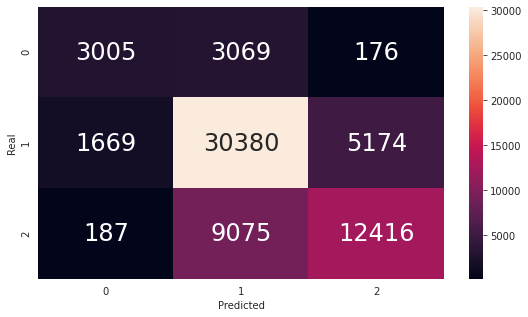

In [ ]:
df_cm_rf = pd.DataFrame(confusion_matrix(y_test, y_pred), columns=np.unique(y_test), index = np.unique(y_test))
df_cm_rf.index.name = 'Real'
df_cm_rf.columns.name = 'Predicted'
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.heatmap(df_cm_rf, annot=True, fmt='d', annot_kws={"size": 24})

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[   14  6243     0]
 [    5 37038     0]
 [    2 21849     0]]


In [ ]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Accuracy
0.5687096130527544


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.00      0.00      6257
           1       0.57      1.00      0.73     37043
           2       0.00      0.00      0.00     21851

    accuracy                           0.57     65151
   macro avg       0.41      0.33      0.24     65151
weighted avg       0.39      0.57      0.41     65151



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred = xgb.predict(x_test)

In [ ]:
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix
[[ 2250  3954    53]
 [ 1313 32334  3396]
 [   86 12422  9343]]


In [ ]:
print("Accuracy")
print(accuracy_score(y_test, y_pred))

Accuracy
0.674233703243235


In [ ]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.36      0.45      6257
           1       0.66      0.87      0.75     37043
           2       0.73      0.43      0.54     21851

    accuracy                           0.67     65151
   macro avg       0.67      0.55      0.58     65151
weighted avg       0.68      0.67      0.65     65151



In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

classifier = Sequential()
classifier.add(Dense(64, activation = "relu", kernel_initializer = "uniform", input_dim = x_train.shape[1]))
classifier.add(Dense(64, activation = "relu"))
classifier.add(Dense(4, activation = "softmax"))
classifier.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
print(classifier.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3904      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
Total params: 8,324
Trainable params: 8,324
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.utils.np_utils import to_categorical

y_binary = to_categorical(y_train)
history = classifier.fit(x_train, y_binary, epochs = 500, batch_size= 32)

Epoch 1/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8395 - accuracy: 0.5707
Epoch 2/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8327 - accuracy: 0.5719
Epoch 3/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8270 - accuracy: 0.5728
Epoch 4/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8244 - accuracy: 0.5733
Epoch 5/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8260 - accuracy: 0.5724
Epoch 6/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8256 - accuracy: 0.5729
Epoch 7/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8257 - accuracy: 0.5728
Epoch 8/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8235 - accuracy: 0.5731
Epoch 9/500
6108/6108 [==============================] - 7s 1ms/step - loss: 0.8245 - accuracy: 0.5727
Epoch 10/500
6108/6108 [==============================] - 7s 1ms/step - l

dict_keys(['loss', 'accuracy'])


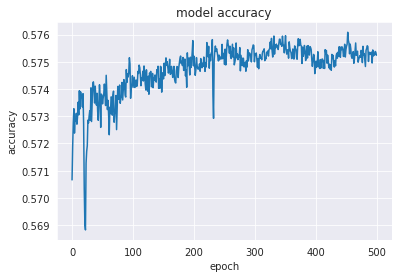

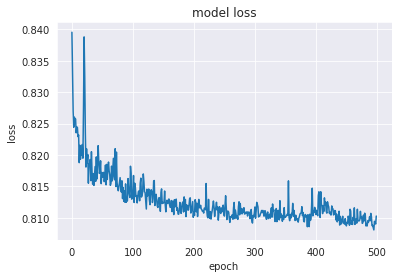

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve

from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(x_train, y_train)  # Fit the visualizer and the model
        visualizer.score(x_test, y_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(x_train, y_train)  
        visualizer.score(x_test, y_test)   
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(x_train, y_train)  
        visualizer.score(x_test, y_test) 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(x_train, y_train)  
        visualizer.score(x_test, y_test)  
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(x_train, y_train)  
        visualizer.score(x_test, y_test)  
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)

In [ ]:
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(x_train, y_train)  
        y_pred = model.predict(x_test)
        try: 
            y_prob = model.predict_proba(x_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(x_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

In [ ]:
classes = train['damage_grade'].value_counts().index.tolist()
classes

[1, 2, 0]

In [ ]:
classifiers = [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
               RandomForestClassifier(ccp_alpha=0.0, criterion='entropy', max_depth=None, max_features='auto',
                                      n_estimators=20),
               LogisticRegression(),
               XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)]
               

In [ ]:
classifier_metrics()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
cohen_kappa_score: 0.383
log_loss: 11.558
zero_one_loss: 0.344
hemming_loss: 0.344
matthews_corrcoef: 0.383

------------------------------------------------------
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


cohen_kappa_score: 0.443
log_loss: 1.075
zero_one_loss: 0.296
hemming_loss: 0.296
matthews_corrcoef: 0.448

------------------------------------------------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


cohen_kappa_score: 0.001
log_loss: 0.905
zero_one_loss: 0.431
hemming_loss: 0.431
matthews_corrcoef: 0.015

------------------------------------------------------
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


cohen_kappa_score: 0.353
log_loss: 0.702
zero_one_loss: 0.326
hemming_loss: 0.326
matthews_corrcoef: 0.378

------------------------------------------------------


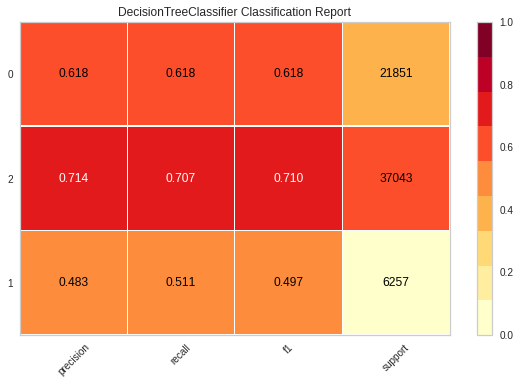

/usr/local/lib/python3.6/dist-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


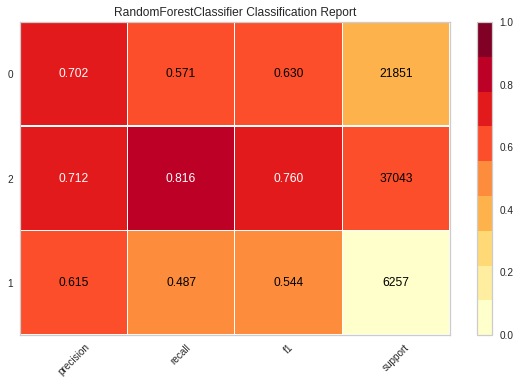

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_di

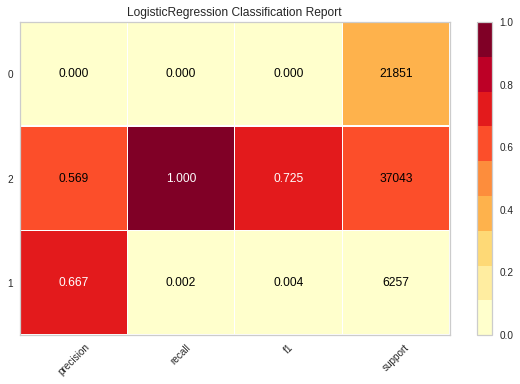

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


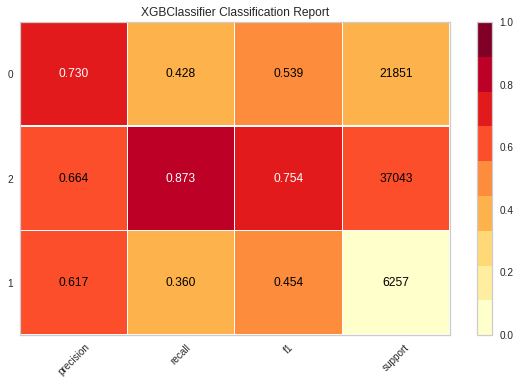

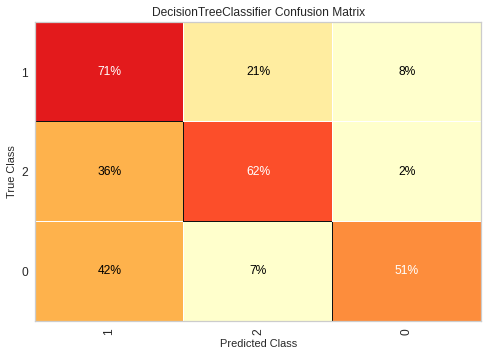

/usr/local/lib/python3.6/dist-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


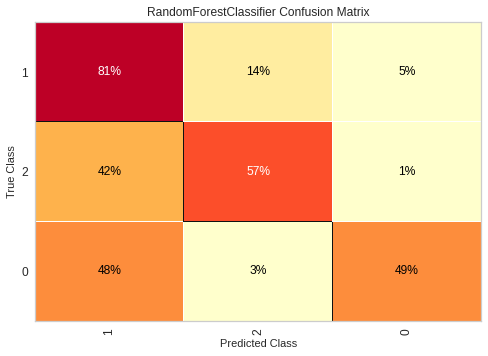

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


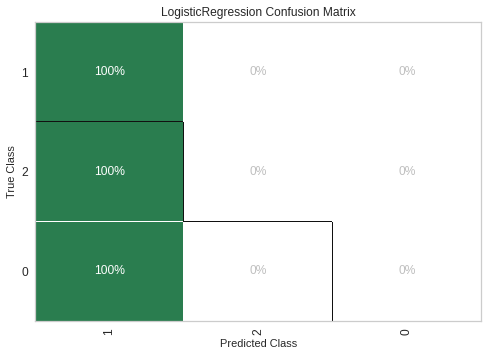

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


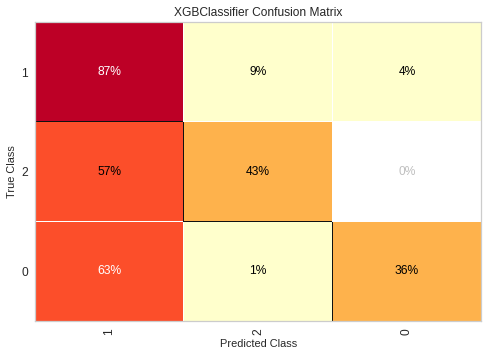

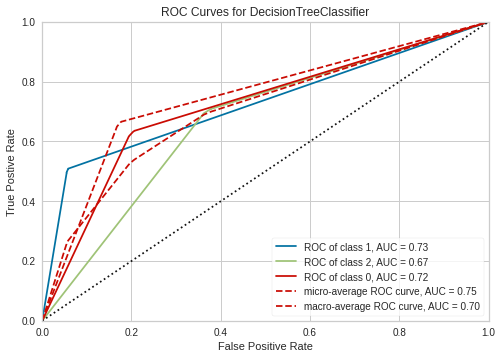

/usr/local/lib/python3.6/dist-packages/yellowbrick/classifier/base.py:104: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


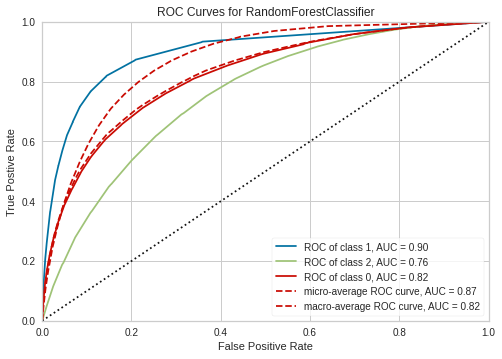

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


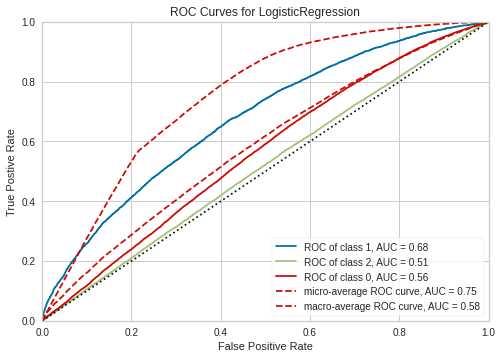

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


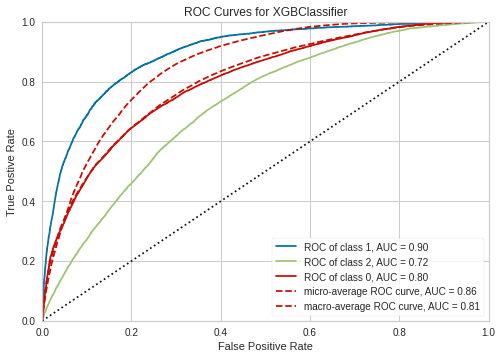

In [ ]:
visualization =[CR_viz(),CM_viz(),ROC_viz()]